# Complejidad de Shapely

Para los algoritmos de distancia:

- Euclideana
- Hausdorff
- Frechet

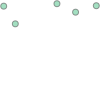

In [2]:
import json
import shapely
import geojsons.generate as generate

shapely.from_geojson(json.dumps(generate.geojson(5)))

In [28]:
import timeit
import matplotlib.pyplot as plt

def plot_tc_distance_fn(fn: callable, fn_name: str, max_input_size=1000) -> None:
    times = []
    
    for i in range(max_input_size):
        t1 = shapely.from_geojson(json.dumps(generate.geojson(i + 1)))
        t2 = shapely.from_geojson(json.dumps(generate.geojson(i + 1)))
        
        start = timeit.default_timer()
        fn(t1, t2)
        end = timeit.default_timer() - start
        
        times.append(end)

    plt.title(fn_name)
    plt.xlabel("input size")
    plt.ylabel("time")
    
    plt.plot(times)

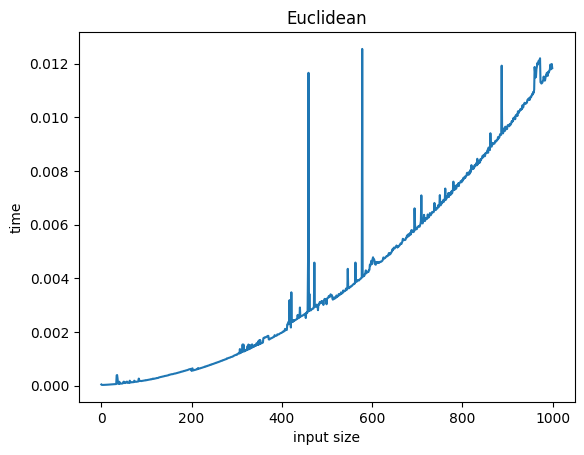

In [30]:
plot_tc_distance_fn(shapely.distance, "Euclidean")

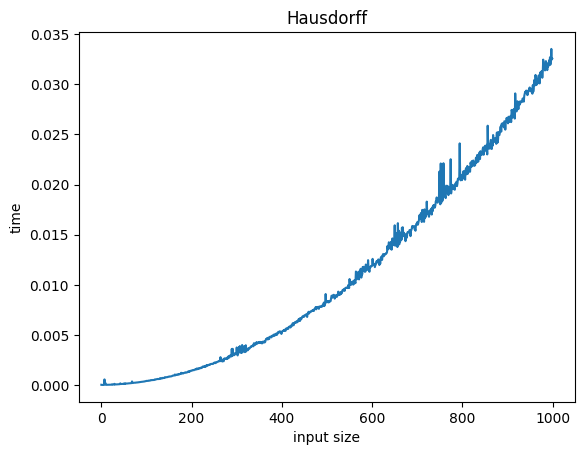

In [31]:
plot_tc_distance_fn(shapely.hausdorff_distance, "Hausdorff")

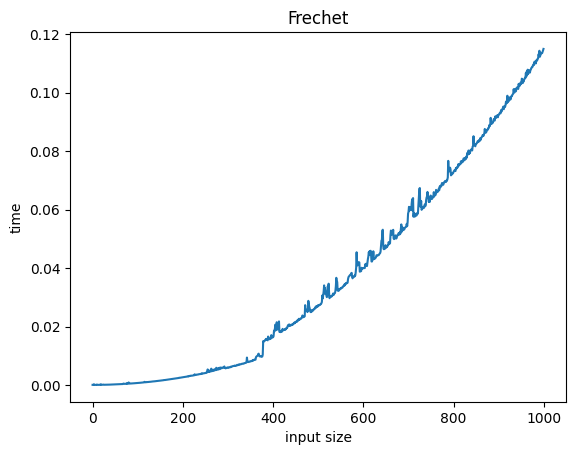

In [32]:
plot_tc_distance_fn(shapely.frechet_distance, "Frechet")